In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import time
import jieba
import warnings  # 忽略警告
warnings.filterwarnings('ignore')

#处理训练集，将训练集的文本信息和label信息合并，清洗特殊符合，同时将文本内容进行分词
def merge_feature_label(feature_name,label_name):
    #训练集数据
    feature=pd.read_csv(feature_name,sep=",")
    #训练集结果
    label=pd.read_csv(label_name,sep=",")
    #pd.read_csv( ,sep=",")函数将逗号分离的值 （csv） 文件读入数据框架
    data=feature.merge(label,on='id')
    #merge（）根据id主键将feature中的文本信息和label中的label信息合并到一张表中
    data["X"]=data[["title","content"]].apply(lambda x:"".join([str(x[0]),str(x[1])]),axis=1)
    #合并title和content为一列命名'X'
    #lambda匿名函数,join（）将每行中的文本/label用空格拼接，为“文本转化为向量”做准备
   # apply(function，axis=1)当一个函数的参数存在于一个元组或者一个字典中时，间接的调用这个函数，
   # 并将元组或者字典中的参数按照顺序传递给参数
   #对一行或一列做出一些操作（axis=1遍历行，axis=0遍历列）
    dataDropNa=data.dropna(axis=0, how='any')
   # dropna（）删除只要含有缺失值的行
    print(dataDropNa.info())#data.info（）给出样本数据的相关信息概览 ：行数，列数，列索引，列非空值个数，列类型，内存占用
    dataDropNa["X"]=dataDropNa["X"].apply(lambda x: str(x).replace("\\n","").replace(".","").replace("\n","").replace("　","").replace("↓","")
                                          .replace("/","").replace("|","").replace(" ","").replace("...","") .replace("?","").replace("(","")
                                          .replace(")","").replace("+","").replace("!","").replace(":","").replace("“","").replace("”","")
                                          .replace(",","").replace("【","").replace("】","").replace("、","").replace("•","").replace("‘","")
                                          .replace("’","") .replace("：","").replace("。","").replace("-","").replace("《","").replace("》","")
                                          .replace("|","").replace("_","").replace("：","").replace("，","").replace("？","").replace("…","")
                                          .replace("（","").replace("）","").replace("｜","").replace("→","").replace("！","")
                                          .replace("'","").replace("\"",""))
    #replace()旧串被新串替换
    dataDropNa["X_split"]=dataDropNa["X"].apply(lambda x:" ".join(jieba.cut(x)))
    # 将每个词用结巴分词以" "分割  eg‘1’，‘规范’：1 规范
    # 默认精简模式cut_all=False
    return dataDropNa
 
dataDropNa=merge_feature_label( "F:\Train_DataSet.csv","F:\Train_DataSet_Label.csv")

#处理测试数据
def process_test(test_name):
    test=pd.read_csv(test_name,sep=",")
    test["X"]=test[["title","content"]].apply(lambda x:"".join([str(x[0]),str(x[1])]),axis=1)
    print(test.info())
    test["X"]=test["X"].apply(lambda x: str(x).replace("\\n","").replace(".","").replace("\n","").replace("　","").replace("↓","")
                                          .replace("/","").replace("|","").replace(" ","").replace("...","") .replace("?","").replace("(","")
                                          .replace(")","").replace("+","").replace("!","").replace(":","").replace("“","").replace("”","")
                                          .replace(",","").replace("【","").replace("】","").replace("、","").replace("•","").replace("‘","")
                                          .replace("’","") .replace("：","").replace("。","").replace("-","").replace("《","").replace("》","")
                                          .replace("|","").replace("_","").replace("：","").replace("，","").replace("？","").replace("…","")
                                          .replace("（","").replace("）","").replace("｜","").replace("→","").replace("！","")
                                          .replace("'","").replace("\"","").replace("▏","").replace("[","").replace(">","").replace("]",""))
    test["X_split"]=test["X"].apply(lambda x:" ".join(jieba.cut(x)))
    return test
 
testData=process_test( "F:\Test_DataSet.csv")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7265 entries, 0 to 7339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       7265 non-null   object
 1   title    7265 non-null   object
 2   content  7265 non-null   object
 3   label    7265 non-null   int64 
 4   X        7265 non-null   object
dtypes: int64(1), object(4)
memory usage: 340.5+ KB
None


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 0.655 seconds.
Prefix dict has been built successfully.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7356 entries, 0 to 7355
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       7356 non-null   object
 1   title    7356 non-null   object
 2   content  7288 non-null   object
 3   X        7356 non-null   object
dtypes: object(4)
memory usage: 230.0+ KB
None


In [ ]:
####实例展示#####非实验主体#####

In [2]:
import warnings  # 忽略警告
warnings.filterwarnings('ignore')
feature=pd.read_csv("F:\Train_DataSet.csv",sep=",")
label=pd.read_csv("F:\Train_DataSet_Label.csv",sep=",")
data=feature.merge(label,on='id')
data["X"]=data[["title","content"]].apply(lambda x:"".join([str(x[0]),str(x[1])]),axis=1)
dataDropNa=data.dropna(axis=0, how='any')
dataDropNa["X"]=dataDropNa["X"].apply(lambda x: str(x).replace("\\n","").replace(".","").replace("\n","").replace("　","").replace("↓","")
                                          .replace("/","").replace("|","").replace(" ","").replace("...","") .replace("?","").replace("(","")
                                          .replace(")","").replace("+","").replace("!","").replace(":","").replace("“","").replace("”","")
                                          .replace(",","").replace("【","").replace("】","").replace("、","").replace("•","").replace("‘","")
                                          .replace("’","") .replace("：","").replace("。","").replace("-","").replace("《","").replace("》","")
                                          .replace("|","").replace("_","").replace("：","").replace("，","").replace("？","").replace("…","")
                                          .replace("（","").replace("）","").replace("｜","").replace("→","").replace("！","")
                                          .replace("'","").replace("\"",""))
dataDropNa["X_split"]=dataDropNa["X"].apply(lambda x:" ".join(jieba.cut(x)))
display(dataDropNa["X_split"])

0       问责 领导 上 黄镇 党委书记 张涛 宣国 才 真能 一手遮天 吗 这 几天 看 了 有人 ...
1       江歌 事件 教会 孩子 善良 的 同时 更要 懂得 保护 自己 过去 一年 的 江歌 悲剧 ...
2       绝味 鸭 脖 广告 开 黄腔 引 众怒 双 11 这么 拼值 吗 双 111600 亿 的 ...
3       央视 曝光 如东 一 医药企业 将 槽罐车 改成 垃圾车 夜间 偷排 高浓度 废水 2016...
4       恶劣 至极 央视 都 曝光 了 南通 如东 一 医药企业 将 槽罐车 改成 洒水车 夜间 偷...
                              ...                        
7335    珊瑚 裸尾鼠 首个 因 全球 气候 变暖 灭绝 的 哺乳动物 凯文 登上 前往 澳大利亚 的...
7336    独居 老人 做饭 忘关 火 南通 志愿者 及时发现 转危为安 江海 明珠 网讯 记者 修雨竹...
7337    被 生意 上 的 人 给 利用 合同诈骗 诈骗 三十万 够判 多少 年 在 律师 3651 ...
7338    奎山 汽贸 城 去年 那场 火灾 调查 情况 报告 出来 了 26 日 日照 经济 技术开发...
7339    曝光 台 调查 市场 消防通道 被 长期 霸占 事情 并非 想象 的 那样 消防通道 是 生...
Name: X_split, Length: 7265, dtype: object

In [ ]:
####实验展示结束####

In [3]:
#获取文本内容的tf-idf表示
xTrain=dataDropNa["X_split"]#训练集
xTest=testData["X_split"] #测试集
vec1 = TfidfVectorizer(ngram_range=(1,2),stop_words=["F:\baidu_stopwords.txt"],min_df=3, max_df=0.9,use_idf=1,smooth_idf=1, sublinear_tf=1)
# 百度停词表
vec2 = TfidfVectorizer(ngram_range=(1,2),stop_words=["F:\hit_stopwords.txt"],min_df=3, max_df=0.9,use_idf=1,smooth_idf=1, sublinear_tf=1)
# 哈工大停词表
vec3 = TfidfVectorizer(ngram_range=(1,2),stop_words=["F:\cn_stopwords.txt"],min_df=3, max_df=0.9,use_idf=1,smooth_idf=1, sublinear_tf=1)
# 中文停词表
# tf-idf作为文体特征提取的统计方法之一，用于文本分类任务，将原始文档集合转换为tf-idf 特征矩阵
# tf:词频  #idf：逆文本频率 #tf-idf：词频 * 逆文档频率
# k：某词出现的频率 n：整个库文本数 tf=k/n idf=log(n/k)
# ngram_range: (1, 2),  # 要提取的n-grams中n值范围的下限和上限，min_n <= n <= max_n
# min_df:  # 词汇表中忽略文档频率低于该值的词；
# max_df:  # 词汇表中忽略文档频率高于该值的词；
# use_idf: True, # 是否计算idf，布尔值，False时idf=1。
# smooth_idf: True(1), # 在文档频率上加1来平滑 idf ，避免分母为0
# sublinear_tf: False, # 应用次线性 tf 缩放，即将 tf 替换为 1 + log(tf)

# 百度停词表
xTrain_tfidf1 = vec1.fit_transform(xTrain)
# 将序列重新排列后再进行标准化
xTest_tfidf1 = vec1.transform(xTest)
# transform 是真正做归一化和标准化的函数
yTrain1=dataDropNa["label"]#训练集并入的标签列
# 对于数据集处理上，会直接对训练集拟合+转换，然后对测试集转换。
  
# 哈工大停词表   
xTrain_tfidf2 = vec2.fit_transform(xTrain)
# 将序列重新排列后再进行标准化
xTest_tfidf2 = vec2.transform(xTest)
# transform 是真正做归一化和标准化的函数
yTrain2=dataDropNa["label"]#训练集并入的标签列

# 中文停词表
xTrain_tfidf3 = vec3.fit_transform(xTrain)
# 将序列重新排列后再进行标准化
xTest_tfidf3= vec3.transform(xTest)
# transform 是真正做归一化和标准化的函数
yTrain3=dataDropNa["label"]#训练集并入的标签列

In [4]:
######实验数据部分展示结束########

In [5]:
print(xTrain_tfidf1) 
# 第0个字符串，对应词典序号为159272的词的TFIDF为0.0665255256468
print(xTest_tfidf1)

  (0, 41894)	0.07861544299881248
  (0, 5067)	0.09090505211908176
  (0, 33527)	0.09425289669876104
  (0, 90918)	0.09637462861785251
  (0, 150734)	0.09897141861728104
  (0, 65717)	0.08719910830229238
  (0, 1775)	0.08439263142364
  (0, 105682)	0.09637462861785251
  (0, 24640)	0.07764510562202537
  (0, 135137)	0.09090505211908176
  (0, 17712)	0.09637462861785251
  (0, 21988)	0.06083427945644128
  (0, 159348)	0.08830826211965322
  (0, 151266)	0.09897141861728104
  (0, 52436)	0.09090505211908176
  (0, 147176)	0.09090505211908176
  (0, 52430)	0.09897141861728104
  (0, 143389)	0.09897141861728104
  (0, 63809)	0.1272261072903349
  (0, 75833)	0.08525504864266029
  (0, 98158)	0.09897141861728104
  (0, 50342)	0.06174747773179964
  (0, 11785)	0.032073236755327444
  (0, 41892)	0.05223153659632011
  (0, 126179)	0.07277244493425997
  :	:
  (7264, 18354)	0.04108416927750267
  (7264, 144961)	0.04416426198739304
  (7264, 105965)	0.024677269265384914
  (7264, 150968)	0.0180712603128331
  (7264, 150780)	0.

In [6]:
print(xTrain_tfidf1.todense()) # 转化为更直观的一般矩阵

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.15128929 0.         0.        ]]


In [7]:
######实验数据部分展示结束########

In [3]:
#训练逻辑回归模型

#百度停词表
clf1 = LogisticRegression(C=4, dual=True)
clf1.fit(xTrain_tfidf1, yTrain1)
 
#预测测试集，并生成结果提交
preds1=clf1.predict_proba(xTest_tfidf1)
preds1=np.argmax(preds1,axis=1)
test_pred1=pd.DataFrame(preds1)
test_pred1.columns=["label"]
# print(test_pred.shape)
test_pred1["id"]=list(testData["id"])
display(test_pred1[["id","label"]])
test_pred1[["id","label"]].to_csv('sub_lr_baidu1.csv',index=None)

,id,label
0,00005a3efe934a19adc0b69b05faeae7,1
1,0009dc82c41341d794837271d4dbff5f,2
2,000f3763b6074588817c9ab90a22a814,1
3,00117934dbe240068c95b6d04b08eea7,1
4,0014cef5ccfa43b3a6b20162a03763fa,2
5,0015fb20dbd54d249a50559789f43c52,1
6,002a0b77fded4ae1abaa8ed9f2ad0824,2
7,002c023ddb7343fdb8b3652ace2ded15,1
8,002daa98e1b240679212a1b7a0402996,2
9,00305089bee5422ca2423176c448e91a,2


In [4]:
#训练逻辑回归模型

# 哈工大停词表
clf2 = LogisticRegression(C=4, dual=True)
clf2.fit(xTrain_tfidf2, yTrain2)
 
#预测测试集，并生成结果提交
preds2=clf2.predict_proba(xTest_tfidf2)
preds2=np.argmax(preds2,axis=1)
test_pred2=pd.DataFrame(preds2)
test_pred2.columns=["label"]
# print(test_pred.shape)
test_pred2["id"]=list(testData["id"])
display(test_pred2[["id","label"]])
test_pred2[["id","label"]].to_csv('sub_lr_ha2.csv',index=None)

,id,label
0,00005a3efe934a19adc0b69b05faeae7,1
1,0009dc82c41341d794837271d4dbff5f,2
2,000f3763b6074588817c9ab90a22a814,1
3,00117934dbe240068c95b6d04b08eea7,1
4,0014cef5ccfa43b3a6b20162a03763fa,2
5,0015fb20dbd54d249a50559789f43c52,1
6,002a0b77fded4ae1abaa8ed9f2ad0824,2
7,002c023ddb7343fdb8b3652ace2ded15,1
8,002daa98e1b240679212a1b7a0402996,2
9,00305089bee5422ca2423176c448e91a,2


In [5]:
#训练逻辑回归模型

# 中文停词表
clf3 = LogisticRegression(C=4, dual=True)
clf3.fit(xTrain_tfidf3, yTrain3)
 
#预测测试集，并生成结果提交
preds3=clf3.predict_proba(xTest_tfidf3)
preds3=np.argmax(preds3,axis=1)
test_pred3=pd.DataFrame(preds3)
test_pred3.columns=["label"]
# print(test_pred.shape)
test_pred3["id"]=list(testData["id"])
display(test_pred3[["id","label"]])
test_pred3[["id","label"]].to_csv('sub_lr_zhongwen3.csv',index=None)

,id,label
0,00005a3efe934a19adc0b69b05faeae7,1
1,0009dc82c41341d794837271d4dbff5f,2
2,000f3763b6074588817c9ab90a22a814,1
3,00117934dbe240068c95b6d04b08eea7,1
4,0014cef5ccfa43b3a6b20162a03763fa,2
5,0015fb20dbd54d249a50559789f43c52,1
6,002a0b77fded4ae1abaa8ed9f2ad0824,2
7,002c023ddb7343fdb8b3652ace2ded15,1
8,002daa98e1b240679212a1b7a0402996,2
9,00305089bee5422ca2423176c448e91a,2


In [ ]:
#######实验部分数据展示#######

In [8]:
display(preds)

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
#######实验部分数据展示结束#######

In [7]:
#训练支持向量机模型
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(xTrain_tfidf1, yTrain1)
 
#预测测试集，并生成结果提交
preds4=lin_clf.predict(xTest_tfidf1)
test_pred4=pd.DataFrame(preds4)
test_pred4.columns=["label"]
test_pred4["id"]=list(testData["id"])
display(test_pred4[["id","label"]])
test_pred4[["id","label"]].to_csv('sub_svm_baseline1.csv',index=None)

,id,label
0,00005a3efe934a19adc0b69b05faeae7,1
1,0009dc82c41341d794837271d4dbff5f,2
2,000f3763b6074588817c9ab90a22a814,1
3,00117934dbe240068c95b6d04b08eea7,1
4,0014cef5ccfa43b3a6b20162a03763fa,2
5,0015fb20dbd54d249a50559789f43c52,1
6,002a0b77fded4ae1abaa8ed9f2ad0824,2
7,002c023ddb7343fdb8b3652ace2ded15,1
8,002daa98e1b240679212a1b7a0402996,2
9,00305089bee5422ca2423176c448e91a,2


In [ ]:
####实验思路以及后续数据处理对比#####

In [ ]:
# 1、数据清洗：首先将title和content拼接，删除有nan的行，通过观察文本，将一些特殊符号去除

# 2、tf-idf：将文本转换为tf-idf权重表示

# 3、模型训练：使用线性模型LR，SVM模型训练模型，预测，拼成结果提交形式提交

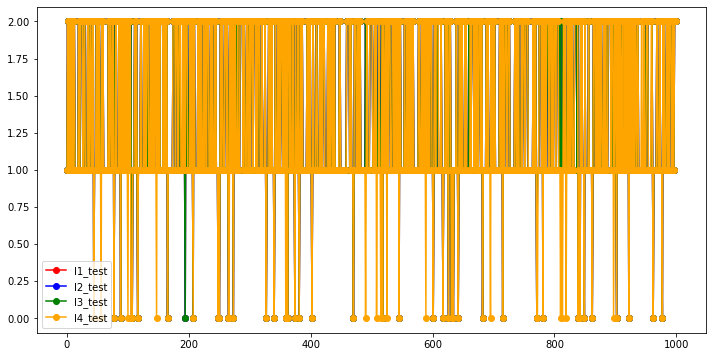

In [65]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array(range(0,1000))
# 数据太多只选取了前1000个
a=np.array(test_pred1["label"][:1000])
b=np.array(test_pred2["label"][:1000])
c=np.array(test_pred3["label"][:1000])
d=np.array(test_pred4["label"][:1000])
data = [a,b,c,d]
label = ['l1_test', 'l2_test', 'l3_test', "l4_test"]
color = ['red', 'blue', 'green', 'orange']
# 改变颜色观察，不要的组改为白色，观察其他组
plt.figure(figsize=(12, 6))
for i in range(4) :     
    plt.plot(x,data[i], label=label[i], color=color[i],marker = "o")
plt.legend(loc="best")
plt.show()